In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import pandas as pd

df = pd.read_csv("/content/netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [18]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


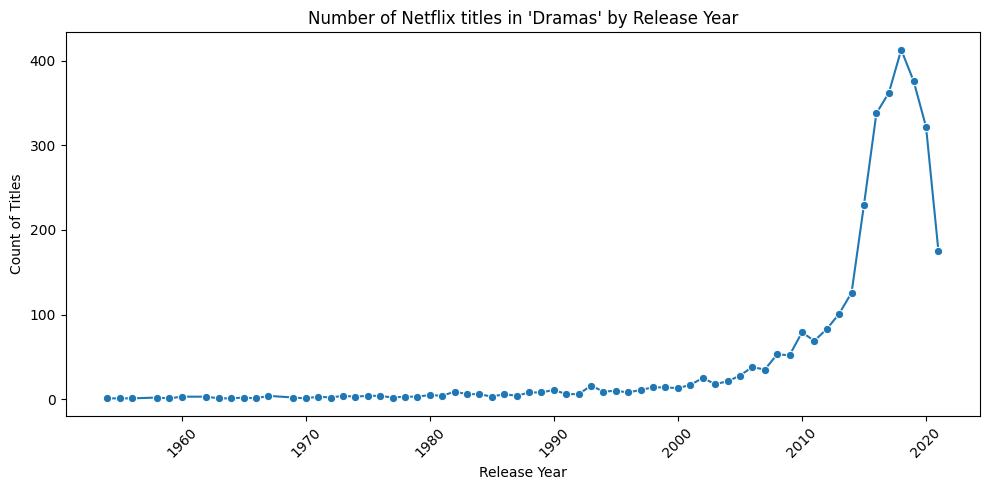

In [25]:
genre = "Dramas"

df_genre = df[df['listed_in'].str.contains(genre, na=False)]

year_counts = df_genre.groupby('release_year').size().reset_index(name='count').sort_values('release_year')
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.lineplot(x='release_year', y='count', data=year_counts, marker="o")
plt.title(f"Number of Netflix titles in '{genre}' by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
drama = df[df['listed_in'].str.contains('Dramas', na=False)]
comedy = df[df['listed_in'].str.contains('Comedies', na=False)]


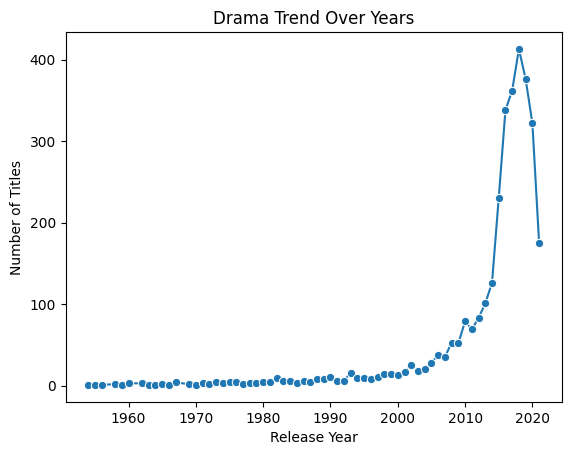

In [28]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')

plt.title('Drama Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, marker="o")
plt.show()

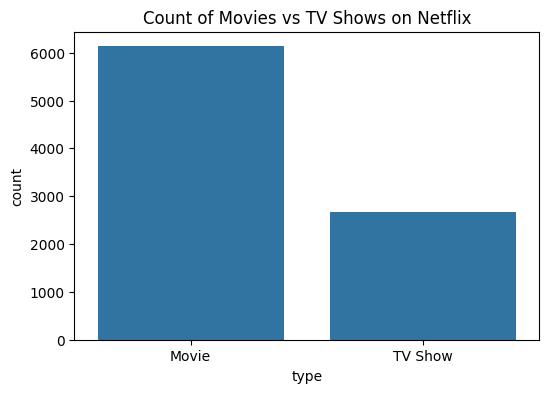

In [19]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="type")
plt.title("Count of Movies vs TV Shows on Netflix")
plt.show()


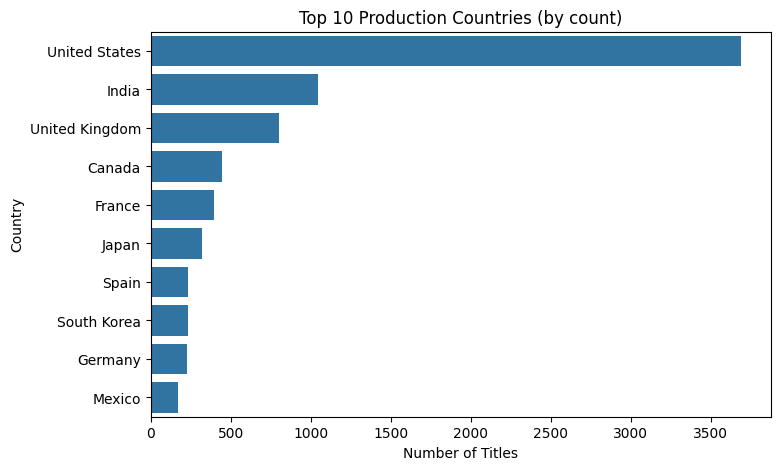

In [20]:
df_countries = df.dropna(subset=["country"]).copy()
df_countries["country_list"] = df_countries["country"].str.split(", ")

df_expl = df_countries.explode("country_list")

top_countries = df_expl["country_list"].value_counts().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(y=top_countries.index, x=top_countries.values, orient="h")
plt.title("Top 10 Production Countries (by count)")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

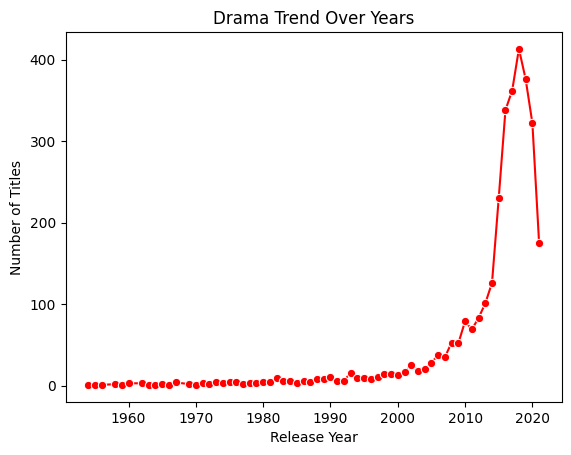

In [30]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')

plt.title('Drama Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, color='r', marker="o")
plt.show()

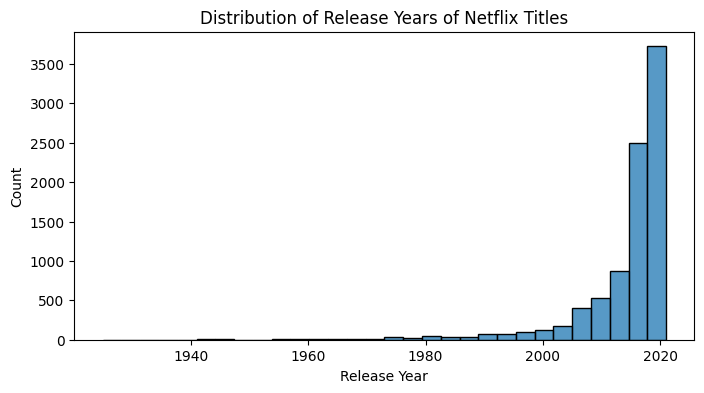

In [21]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x="release_year", bins=30, kde=False)
plt.title("Distribution of Release Years of Netflix Titles")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

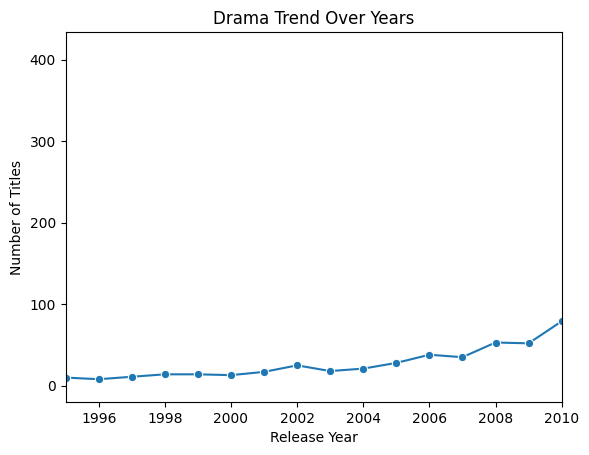

In [32]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')

plt.title('Drama Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.xlim(left=1995, right=2010)
sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, marker="o")
plt.show()

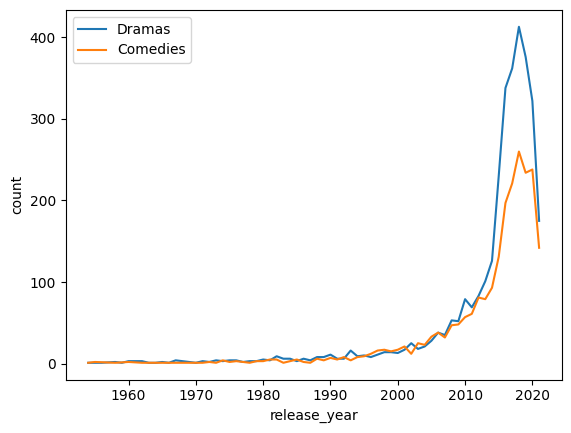

In [34]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, label='Dramas')
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts, label='Comedies')
plt.show()

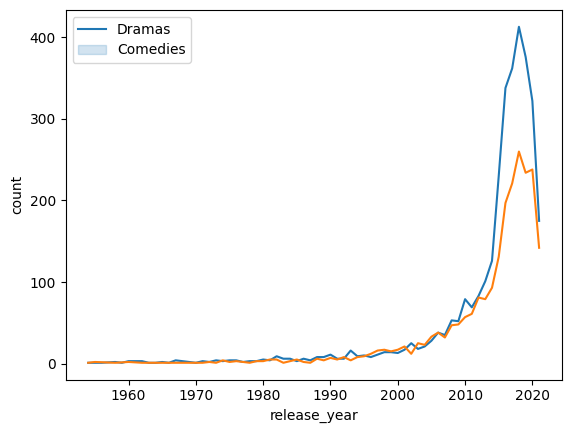

In [36]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts)
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts)
plt.legend(['Dramas', 'Comedies'])
plt.show()

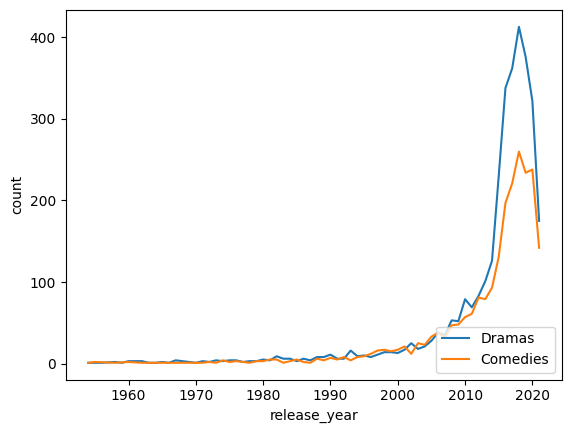

In [38]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, label='Dramas')
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts, label='Comedies')
plt.legend(loc='lower right')
plt.show()

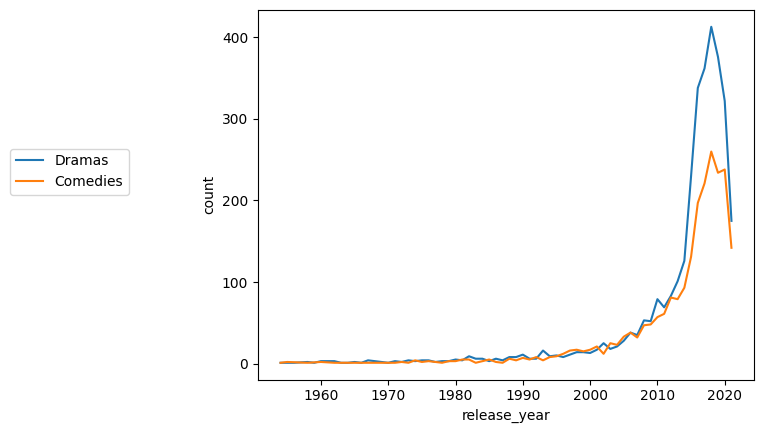

In [40]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, label='Dramas')
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts, label='Comedies')
plt.legend(loc=(-0.5, 0.5))
plt.show()

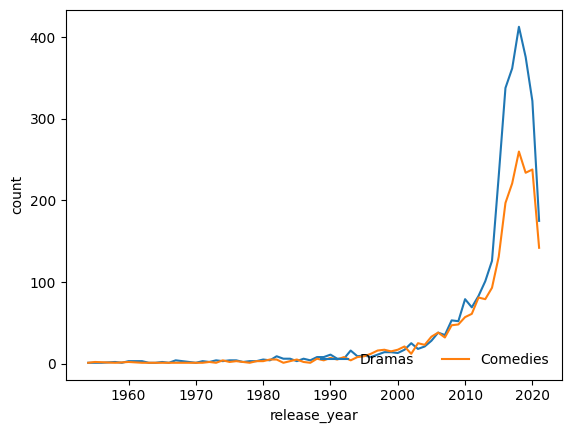

In [42]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, label='Dramas')
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts, label='Comedies')
plt.legend(loc='lower right', ncol=2, frameon=False)
plt.show()

In [43]:

drama_counts = drama.groupby('release_year').size()
print("Maximum number of Dramas released in a single year:", drama_counts.max())


Maximum number of Dramas released in a single year: 413


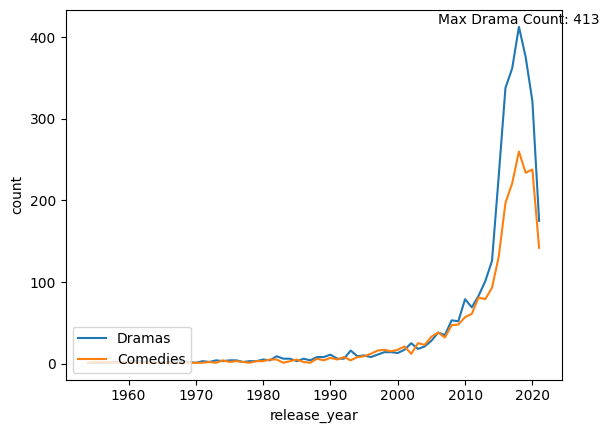

In [45]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, label='Dramas')
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts, label='Comedies')
plt.legend(loc='lower left')

max_drama_year = drama_yearly_counts.loc[drama_yearly_counts['count'].idxmax(), 'release_year']
max_drama_count = drama_yearly_counts['count'].max()
plt.text(max_drama_year, max_drama_count, f'Max Drama Count: {max_drama_count}', ha='center', va='bottom')

plt.show()

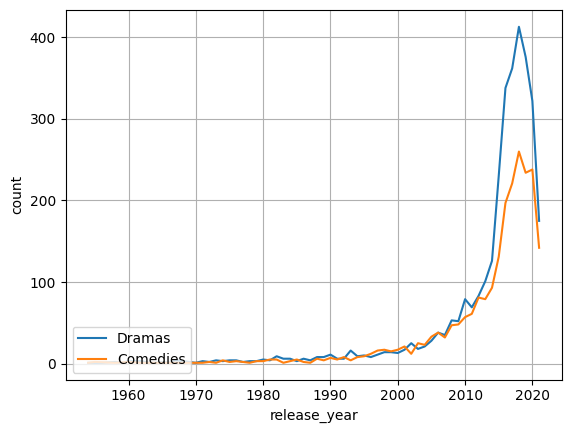

In [50]:
drama_yearly_counts = drama.groupby('release_year').size().reset_index(name='count')
comedy_yearly_counts = comedy.groupby('release_year').size().reset_index(name='count')

sns.lineplot(x='release_year', y='count', data=drama_yearly_counts, label='Dramas')
sns.lineplot(x='release_year', y='count', data=comedy_yearly_counts, label='Comedies')
plt.legend(loc='lower left')
plt.grid()
plt.show()

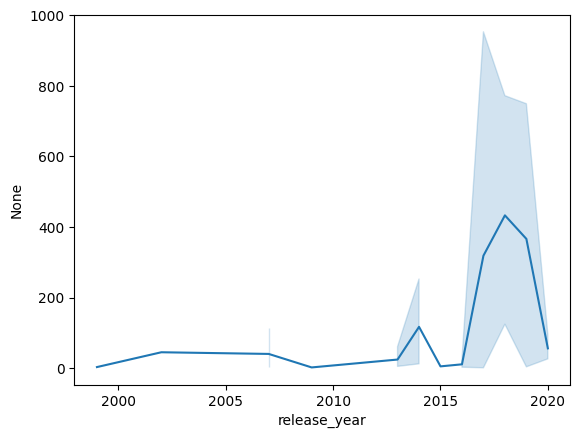

In [47]:
sns.lineplot(data=df, x='release_year', y=df.groupby('release_year').size())
plt.show()


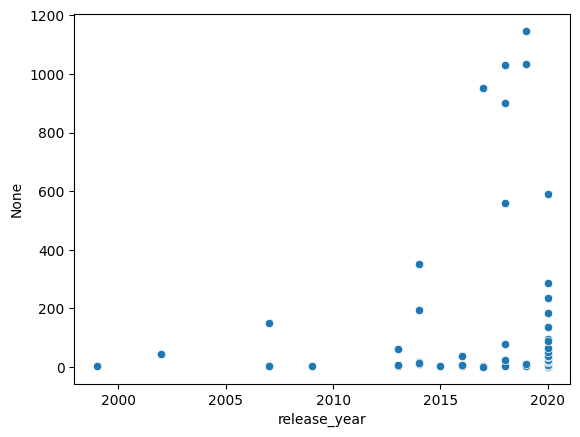

In [48]:
sns.scatterplot(data=df, x='release_year', y=df.groupby('release_year').size())
plt.show()


In [49]:
top3_dir = df['director'].value_counts().index[:3]
top3_gen = df['listed_in'].value_counts().index[:3]
top3_country = df['country'].value_counts().index[:3]

top3_data = df.loc[
    (df["director"].isin(top3_dir)) &
    (df["country"].isin(top3_country)) &
    (df['listed_in'].isin(top3_gen))
]
top3_data.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num


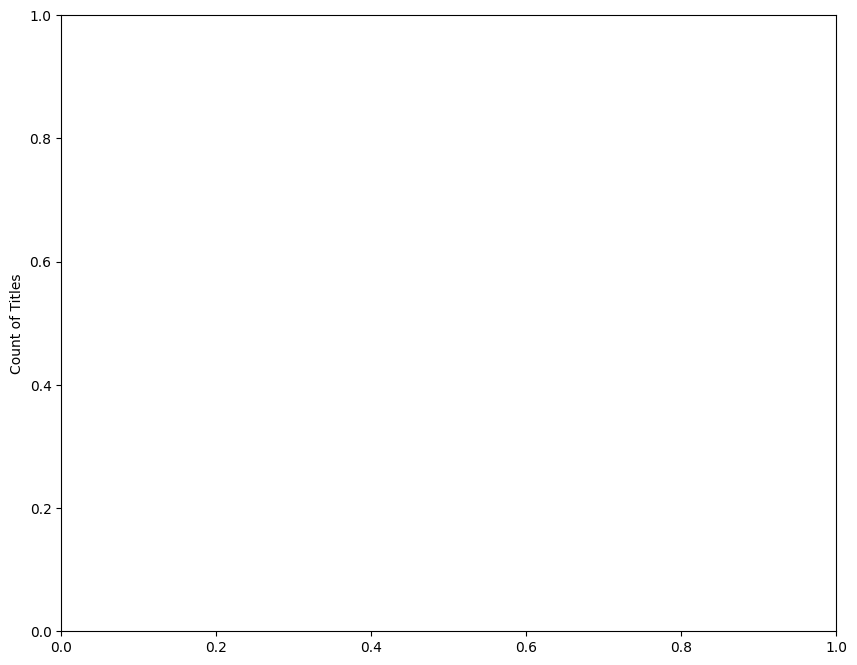

In [51]:
plt.figure(figsize=(10,8))
sns.countplot(x='director', hue='country', data=top3_data)
plt.ylabel('Count of Titles')
plt.show()


In [52]:
df_stacked_plot = pd.crosstab(index=top3_data['director'], columns=top3_data['listed_in'])

df_stacked_plot.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.xticks(rotation=0)
plt.legend(loc='upper left')
plt.show()


TypeError: no numeric data to plot

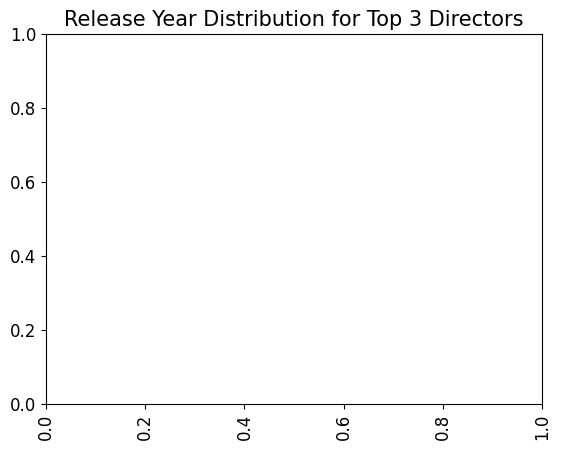

In [54]:
sns.boxplot(x='director', y='release_year', data=top3_data)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Release Year Distribution for Top 3 Directors', fontsize=15)
plt.show()


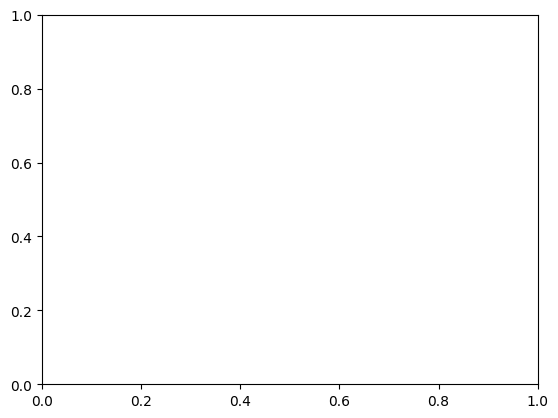

In [55]:
sns.barplot(data=top3_data, x="listed_in", y="release_year", estimator=np.mean)
plt.show()


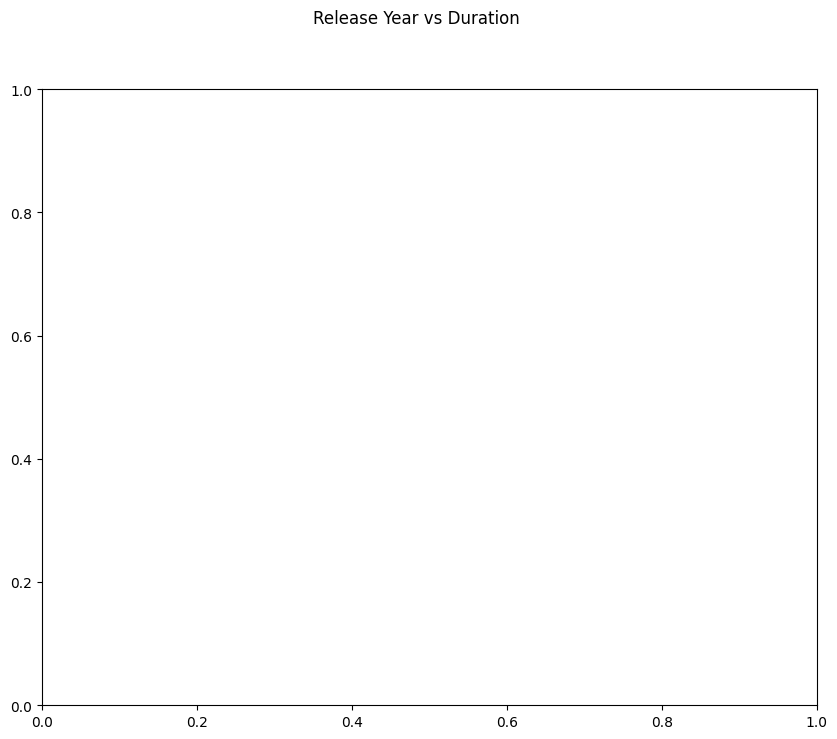

In [56]:
fig = plt.figure(figsize=(10,8))
sns.scatterplot(x=top3_data['release_year'], y=top3_data['duration'].str.extract(r'(\d+)').astype(float))
fig.suptitle('Release Year vs Duration')
plt.show()


ValueError: Could not interpret value `DURATION` for `y`. An entry with this name does not appear in `data`.

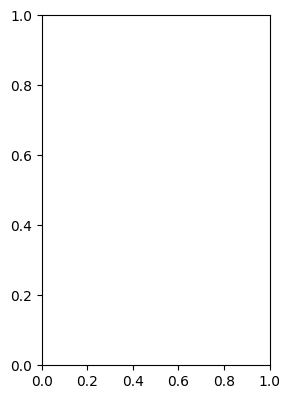

In [57]:
fig = plt.figure(figsize=(10,10))

plt.subplot(2, 3, 1)
sns.scatterplot(x='release_year', y='duration'.upper(), data=top3_data)

plt.subplot(2, 3, 3)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='red')

fig.suptitle('Main title')
plt.show()


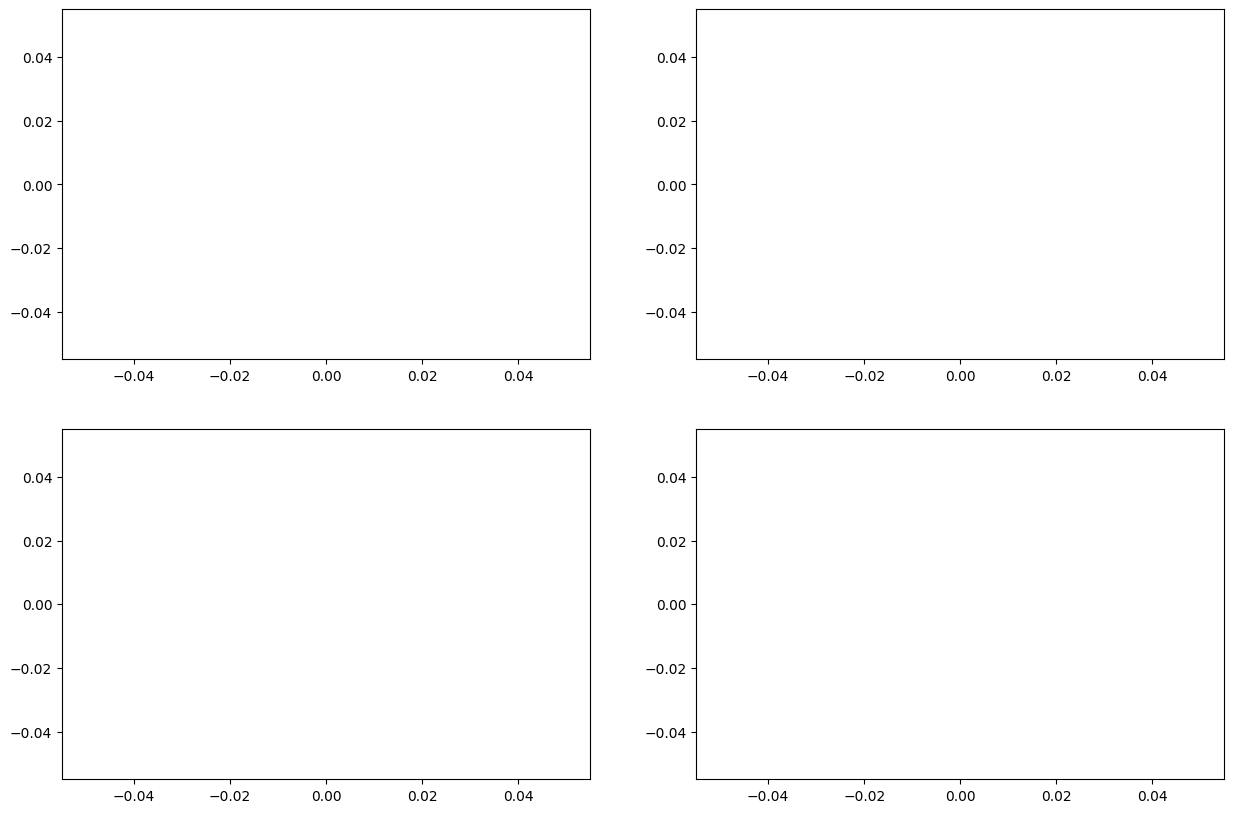

In [58]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0,0].scatter(top3_data['release_year'], top3_data['release_year'])
ax[0,1].scatter(top3_data['release_year'], top3_data['release_year'])
ax[1,0].scatter(top3_data['release_year'], top3_data['release_year'])
ax[1,1].scatter(top3_data['release_year'], top3_data['release_year'])
plt.show()


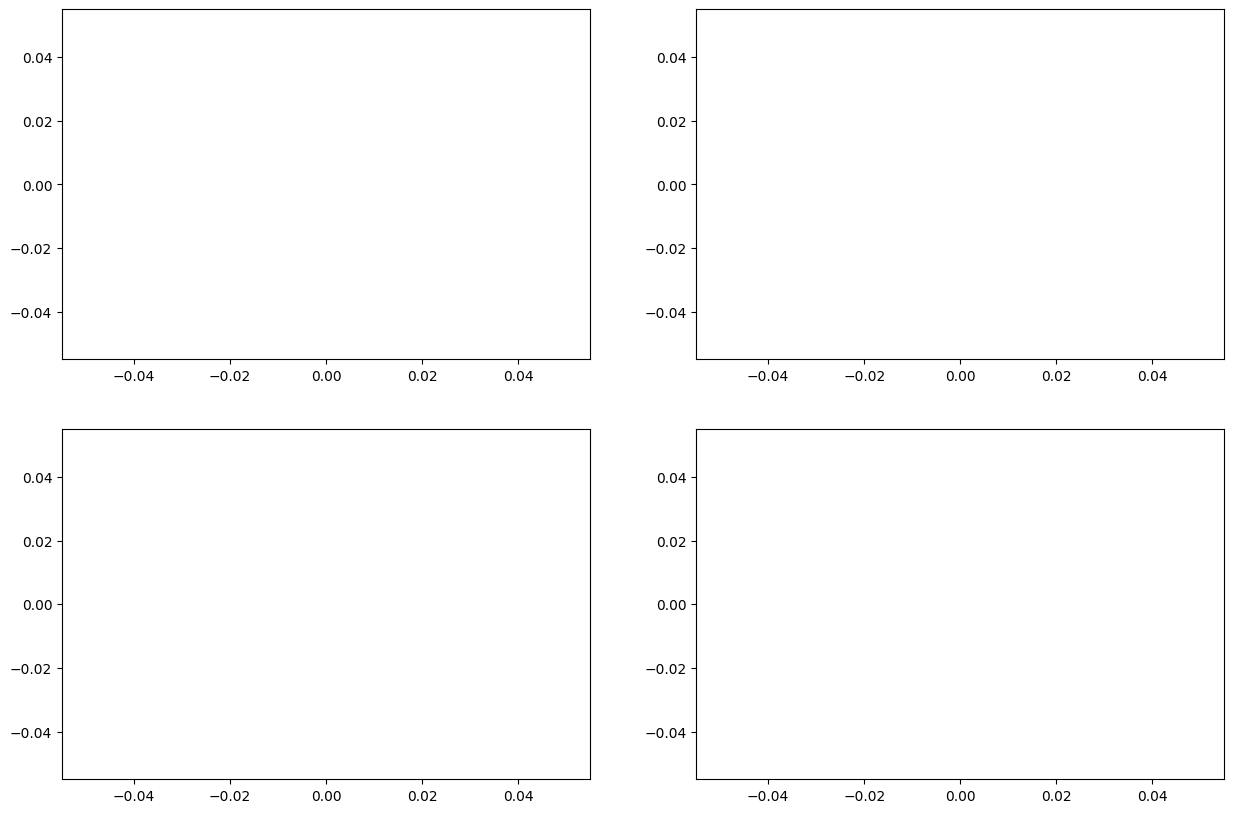

In [59]:
fig, ax = plt.subplots(2, 2, figsize=(15,10))

ax[0,0].scatter(top3_data['release_year'], top3_data['release_year'])
ax[0,1].scatter(top3_data['release_year'], top3_data['release_year'])
ax[1,0].scatter(top3_data['release_year'], top3_data['release_year'])
ax[1,1].scatter(top3_data['release_year'], top3_data['release_year'])
plt.show()


In [53]:
print(ax)


NameError: name 'ax' is not defined

ValueError: Could not interpret value `DURATION` for `y`. An entry with this name does not appear in `data`.

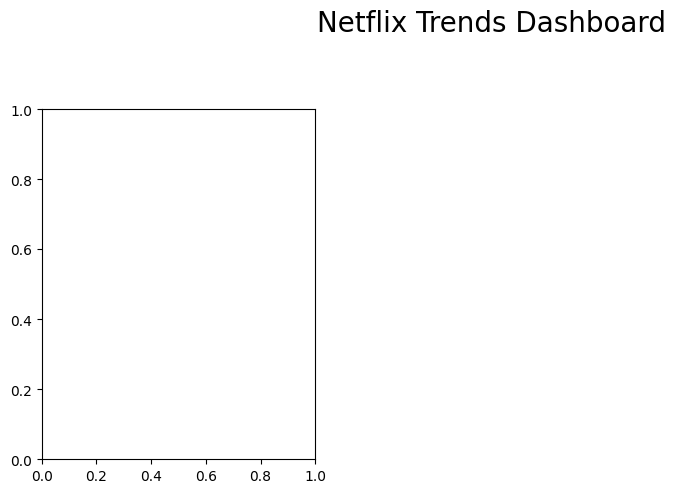

In [60]:
plt.figure(figsize=(12,10)).suptitle("Netflix Trends Dashboard", fontsize=20)

plt.subplot(2, 3, 1)
sns.scatterplot(x='release_year', y='duration'.upper(), data=top3_data)
plt.title('Release vs Duration')

plt.subplot(2, 3, 3)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='red')
plt.title('Release vs Release')

plt.subplot(2, 3, 4)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='green')

plt.subplot(2, 3, 6)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='orange')

plt.show()


ValueError: Could not interpret value `DURATION` for `y`. An entry with this name does not appear in `data`.

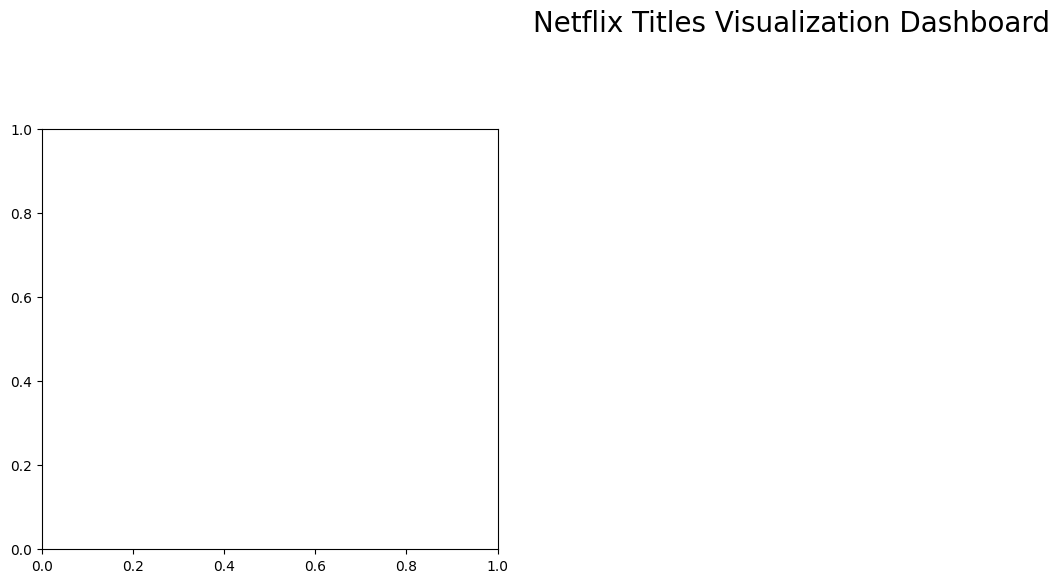

In [61]:
plt.figure(figsize=(20,12)).suptitle("Netflix Titles Visualization Dashboard", fontsize=20)

plt.subplot(2, 3, 1)
sns.scatterplot(x='release_year', y='duration'.upper(), data=top3_data)
plt.title('Release Year vs Duration')

plt.subplot(2, 3, 3)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='red')
plt.title('Release vs Self')

plt.subplot(1,3,2)
sns.countplot(x='director', data=top3_data)
plt.title('Count of Titles by Director')

plt.subplot(2, 3, 4)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='green')

plt.subplot(2, 3, 6)
sns.scatterplot(x='release_year', y='release_year', data=top3_data, color='orange')

plt.show()


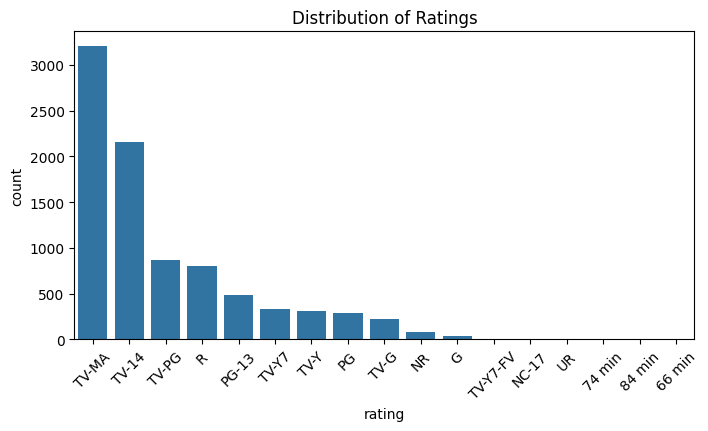

In [22]:
if "rating" in df.columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x="rating", order=df["rating"].value_counts().index)
    plt.xticks(rotation=45)
    plt.title("Distribution of Ratings")
    plt.show()

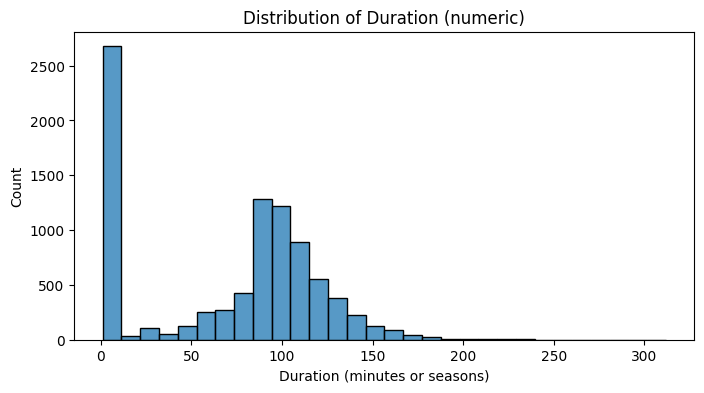

In [23]:
if "duration" in df.columns:

    df["duration_num"] = df["duration"].str.extract(r"(\d+)").astype(float)
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x="duration_num", bins=30)
    plt.title("Distribution of Duration (numeric)")
    plt.xlabel("Duration (minutes or seasons)")
    plt.show()

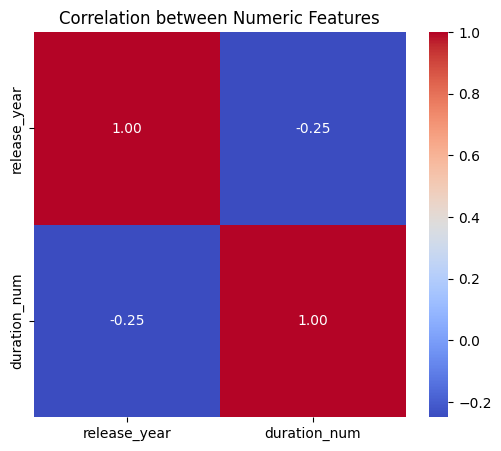

In [24]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
if len(num_cols) > 1:
    plt.figure(figsize=(6,5))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm")
    plt.title("Correlation between Numeric Features")
    plt.show()
